In [1]:
#Load
#Preprocess
#Split (Train, Test)
#Design the Model
#Train
#Evaluate
#Predict


In [2]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
#Load
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

In [6]:
test_images.shape

(10000, 28, 28)

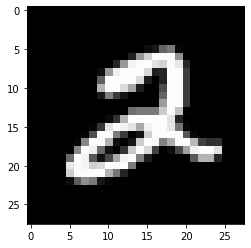

In [7]:
plt.imshow(train_images[5], cmap='gray')

In [8]:
train_labels[5]

2

In [9]:
train_images = train_images.reshape(60000, 784)
test_images = test_images.reshape(10000, 784)

In [10]:
train_images.shape

(60000, 784)

In [11]:
test_images.shape

(10000, 784)

In [12]:
train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0

In [14]:
#train_images[1]

In [15]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

In [18]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [20]:
#Model
from keras.models import Sequential
from keras.layers import Dense

In [22]:
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
#Train
model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2411 - accuracy: 0.9292
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1025 - accuracy: 0.9695
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0737 - accuracy: 0.9776
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0530 - accuracy: 0.9833
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0421 - accuracy: 0.9862


In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (32, 128)                 100480    
                                                                 
 dense_4 (Dense)             (32, 64)                  8256      
                                                                 
 dense_5 (Dense)             (32, 10)                  650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [26]:
#evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels)


313/313 [==============================] - 1s 2ms/step - loss: 0.0856 - accuracy: 0.9752


In [27]:
test_loss

0.08564746379852295

In [28]:
test_acc

0.9751999974250793

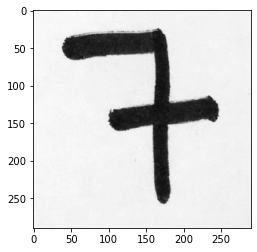

In [30]:
import cv2
test_img = cv2.imread('seven.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(test_img, cmap='gray')

In [32]:
test_img_resized =  cv2.resize(test_img, (28, 28))
test_img_flatten = test_img_resized.reshape(1, 784)
test_img_normalized = test_img_flatten.astype('float32')/255.

In [33]:
pred = model.predict(test_img_normalized)
pred

1/1 [==============================] - 0s 74ms/step


array([[7.2196960e-10, 5.8948245e-07, 1.1742649e-06, 3.0834756e-06,
        6.9795495e-17, 9.9999225e-01, 2.6802846e-07, 2.6475318e-06,
        2.9868167e-14, 1.5536232e-15]], dtype=float32)

In [34]:
import numpy as np 
prediced_label = np.argmax(pred)
prediced_label

5

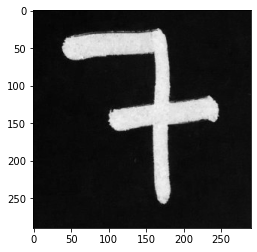

In [35]:
import cv2
test_img = cv2.imread('seven.png', cv2.IMREAD_GRAYSCALE)
test_img_inverted = cv2.bitwise_not(test_img)
plt.imshow(test_img_inverted, cmap='gray')

In [36]:
test_img_resized_2 =  cv2.resize(test_img_inverted, (28, 28))
test_img_flatten_2 = test_img_resized_2.reshape(1, 784)
test_img_normalized_2 = test_img_flatten_2.astype('float32')/255.

In [38]:
pred_2 = model.predict(test_img_normalized_2)
pred_2

1/1 [==============================] - 0s 19ms/step


array([[4.8257075e-06, 5.1366889e-08, 5.1581590e-03, 1.8087883e-01,
        7.4166687e-11, 1.1402984e-02, 8.0156559e-01, 1.7000320e-06,
        9.8787283e-04, 1.4350184e-09]], dtype=float32)

In [39]:
prediced_label_2 = np.argmax(pred_2)
prediced_label_2

6